In [1]:
from qsurface.main import create_phenomenological_toric_superoperator, create_phenomenological_weight_3_toric_superoperator, initialize, run, BenchmarkDecoder, run_multiprocess_superoperator
from qsurface.decoders import mwpm
import pandas as pd

%load_ext line_profiler

# Toric comparison Phenomeological: Inbuilt vs Superoperator

### Superoperator

In [ ]:
code, decoder = initialize((4,4), "toric", "unionfind", plotting=False, superoperator_enable=True, sup_op_file="C:/qarch/qsurface/data/phenomenological/phenomenological_0.0157265_0.0157265_0.06_0.06_toric.csv", initial_states=(0,0))
run(code, decoder, iterations=1000, decode_initial=False)

# %lprun -f code.init_superoperator_errors run(code, decoder, iterations=4, decode_initial=False)

### Superoperator multiprocessing

In [ ]:
code, decoder = initialize((4,4), "toric", "unionfind", plotting=False, superoperator_enable=True, sup_op_file="C:/qarch/qsurface/data/phenomenological/phenomenological_0.0081995_0.0081995_0.032_0.032_toric.csv", initial_states=(0,0))
if __name__ == "__main__":
        print(run_multiprocess_superoperator(code, decoder, iterations=100, decode_initial=False, seed=59))

### Phenomenological

In [31]:
p_bitflip = 0.024
p_phaseflip = 0.024
p_bitflip_plaq = 0.024
p_bitflip_star = 0.024

benchmarker = BenchmarkDecoder({
        "decode": ["duration", "value_to_list"],
        "correct_edge": "count_calls",})

code, decoder = initialize((8,8), "toric", "mwpm", enabled_errors=["pauli"], plotting=False, initial_states=(0,0), faulty_measurements=True)
print(run(code, decoder, iterations=1000, error_rates={"p_bitflip": p_bitflip, "p_phaseflip": p_phaseflip, "p_bitflip_plaq": p_bitflip_plaq, "p_bitflip_star": p_bitflip_star}, decode_initial=False, benchmark=benchmarker))
print(benchmarker.data)
# %lprun -f run run(code, decoder, iterations=10, decode_initial=False)

Running iteration 1000/1000
{'no_error': 938, 'benchmark': {'decoded': 1000, 'iterations': 1000, 'seed': 46831.2769418, 'duration/decode/mean': 0.10618934699990495, 'duration/decode/std': 0.043056208289644675, 'count_calls/correct_edge/mean': 47.199, 'count_calls/correct_edge/std': 6.546250759022297}}
{'decoded': 1000, 'iterations': 1000, 'seed': 46831.2769418}


# Plotting

In [51]:
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.util.compiler import TypeScript

## Perfect Measurements Plot default qsurface (i.i.d. Z)

In [52]:

Z_error_rate = [0.03, 0.04, 0.06, 0.08, 0.09, 0.10, 0.105, 0.11, 0.12, 0.13]
superoperator_Z_error_rate = [0.00767491, 0.0103148, 0.0157265, 0.021326, 0.0242011, 0.0271292, 0.0286139, 0.0301128, 0.0331543, 0.0362564]

X_error_rate = [0.03, 0.04, 0.06, 0.08, 0.09, 0.10, 0.105, 0.11, 0.12, 0.13]
superoperator_X_error_rate = [0.00767491, 0.0103148, 0.0157265, 0.021326, 0.0242011, 0.0271292, 0.0286139, 0.0301128, 0.0331543, 0.0362564]

fig = figure(title="Threshold for phenomenological i.i.d. Z errors (30k iterations, UnionFind)", x_axis_label="error probability", y_axis_label="successful decoding rate")
l6 = [0.972, 0.9651333333333333, 0.9204333333333333, 0.8329666666666666, 0.7802666666666667, 0.7151666666666666, 0.6911666666666667, 0.6646, 0.6042666666666666, 0.5486666666666666]
l8 = [0.9984666666666666, 0.9918333333333333, 0.9562333333333334, 0.8632, 0.7992666666666667, 0.7240666666666666, 0.6883666666666667, 0.6488666666666667, 0.5745333333333333, 0.5149333333333334]
l10 = [0.9995, 0.9967, 0.9717666666666667, 0.8831333333333333, 0.8141333333333334, 0.7293333333333333, 0.6875666666666667, 0.6377, 0.5548333333333333, 0.4791]
l12 = [0.9999, 0.9987333333333334, 0.9797, 0.8982, 0.8194666666666667, 0.7273333333333334, 0.6774333333333333, 0.6279666666666667, 0.5353, 0.45286666666666664]

fig.legend.title = "Lattice Size"
fig.legend.location = "top_right"


fig.line(Z_error_rate, l6, legend_label="6 X 6", color="green", line_width=2)
fig.line(Z_error_rate, l8, legend_label="8 X 8", color="navy", line_width=2)
fig.line(Z_error_rate, l10, legend_label="10 X 10", color="red", line_width=2)
fig.line(Z_error_rate, l12, legend_label="12 X 12", color="black", line_width=2)

fig.circle(Z_error_rate, l6, fill_color="green", size=5)
fig.circle(Z_error_rate, l8, fill_color="navy", size=5)
fig.circle(Z_error_rate, l10, fill_color="red", size=5)
fig.circle(Z_error_rate, l12, fill_color="black", size=5)

show(fig)

c:\qarch\qs_env\lib\site-packages\bokeh\models\plots.py:815: UserWarning: 
You are attempting to set `plot.legend.title` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
c:\qarch\qs_env\lib\site-packages\bokeh\models\plots.py:815: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


## Faulty Measurements phenomenological (original)

In [53]:
p = [0.024, 0.026, 0.028, 0.029, 0.030, 0.032]

fig = figure(title="Threshold for toric faulty measurements (10k iterations, UnionFind)", x_axis_label="error probability p", y_axis_label="successful decoding rate")

l6 = [0.8962, 0.8556, 0.8026, 0.7817, 0.7485, 0.6973]
l8 = [0.9185, 0.8665, 0.8086, 0.7802, 0.7394, 0.6556]
l10 = [0.9315, 0.8758, 0.8036, 0.7558, 0.7093, 0.6068]
l12 = [0.94, 0.879, 0.7953, 0.7448, 0.6738, 0.5419]

fig.line(p, l6, legend_label="6 X 6", color="green", line_width=2)
fig.line(p, l8, legend_label="8 X 8", color="navy", line_width=2)
fig.line(p, l10, legend_label="10 X 10", color="red", line_width=2)
fig.line(p, l12, legend_label="12 X 12", color="black", line_width=2)

fig.circle(p, l6, fill_color="green", size=5)
fig.circle(p, l8, fill_color="navy", size=5)
fig.circle(p, l10, fill_color="red", size=5)
fig.circle(p, l12, fill_color="black", size=5)

show(fig)

c:\qarch\qs_env\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


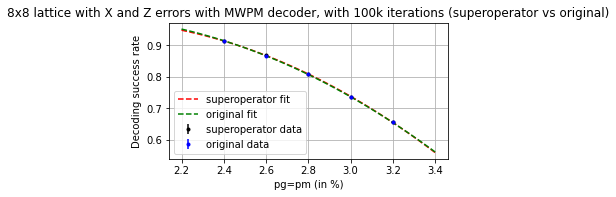

In [55]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math

# 100k iterations union find, sweeping over error rates, 8X8 lattices
super8x8 = np.array([0.91377, 0.86901, 0.81006, 0.73659, 0.65606])
original8x8 = np.array([0.91455, 0.868, 0.80849, 0.73488, 0.6559])
rates = np.array([2.4, 2.6, 2.8, 3.0, 3.2])

def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

def err(x):
    return math.sqrt(x*(1-x)/9999)
error_super = [err(x) for x in super8x8]
error_original = [err(x) for x in original8x8]

rng = np.random.default_rng()
popt_super, pcov_super = curve_fit(fitting_function, rates, super8x8)
popt_original, pcov_original = curve_fit(fitting_function, rates, original8x8)

fig = plt.figure(figsize=(5,2.5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('8x8 lattice with X and Z errors with MWPM decoder, with 100k iterations (superoperator vs original)')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('pg=pm (in %)')
plt.grid()

plt.errorbar(rates,super8x8,yerr=error_super, fmt='k.')
plt.plot(np.linspace(2.2, 3.4, 100),fitting_function(np.linspace(2.2, 3.4, 100),popt_super[0],popt_super[1],popt_super[2],popt_super[3],popt_super[4]),'r--', label='superoperator')

plt.errorbar(rates,original8x8,yerr=error_original,fmt='b.')
plt.plot(np.linspace(2.2, 3.4, 100),fitting_function(np.linspace(2.2, 3.4, 100),popt_original[0],popt_original[1],popt_original[2],popt_original[3],popt_original[4]),'g--', label='original')
plt.legend(['superoperator fit','original fit','superoperator data','original data'])
plt.savefig('comparison.pdf')


In [32]:

{(4, 4): [0.84653], (5, 5): [0.93858], (6, 6): [0.9086], (7, 7): [0.95859], (8, 8): [0.93973]} # Original
{(4, 4): [0.84479], (5, 5): [0.93904], (6, 6): [0.90901], (7, 7): [0.95795], (8, 8): [0.93995]} # Super

# Weight-3 Phenomenological

In [2]:
create_phenomenological_weight_3_toric_superoperator(0.01,0.9, [0.03, 0.05, 0.06, 0.06])